<a href="https://colab.research.google.com/github/raodnik/ML/blob/main/Breast_cancer_Support_vector_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
from sklearn.datasets import load_breast_cancer

In [8]:
cancer = load_breast_cancer()

In [12]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [15]:
df_features = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [16]:
df_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

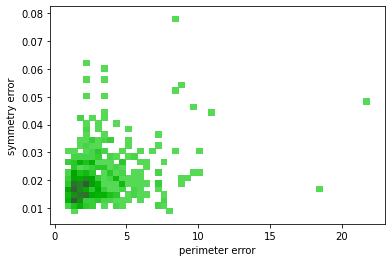

In [19]:
sns.histplot(x='perimeter error', y = 'symmetry error', data=df_features, color='green')

In [20]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [21]:
from sklearn.model_selection import train_test_split


In [34]:
X=df_features
y=cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.svm import SVC

In [36]:
svc_mod = SVC()

In [37]:
svc_mod.fit(X_train,y_train)

SVC()

In [38]:
svc_pred = svc_mod.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test, svc_pred ))
print('\n')
print(confusion_matrix(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



[[ 56  10]
 [  3 102]]


#Grid Search

In [41]:
from sklearn.model_selection import GridSearchCV

In [56]:
#GridSearchCV takes in a dictionary that describes the parameters that should be tried in model to train the grid
param_grid = {'C' : [0.1,10,100,1000], 'gamma' : [0.1,0.01,0.001,0.0001]}

In [48]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [49]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.01;, score=0.625 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.01;, score=0.633 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.01;, score=0.633 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.637 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.001;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [51]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [52]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [53]:
grid_pred = grid.predict(X_test)

In [54]:
print(confusion_matrix(y_test, grid_pred))

[[ 60   6]
 [  3 102]]


In [55]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        66
           1       0.94      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

